## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('data/kc_house_data.csv')
print(data.shape)
print(data.info())
print(data.describe())
data.head()

(21597, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
len(data['zipcode'].unique())

70

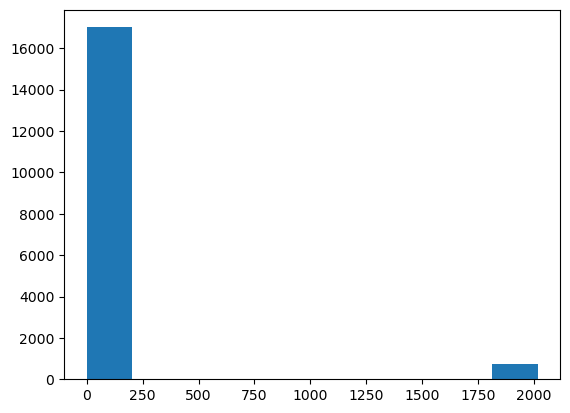

In [4]:
plt.hist(data['yr_renovated']);

In [5]:
sum(data['waterfront'].isna())/len(data['waterfront'])

0.11001527989998611

In [6]:
sum(data['yr_renovated'].isna())/len(data['yr_renovated'])

0.17789507802009538

In [7]:
data['yr_renovated'].value_counts()

yr_renovated
0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64

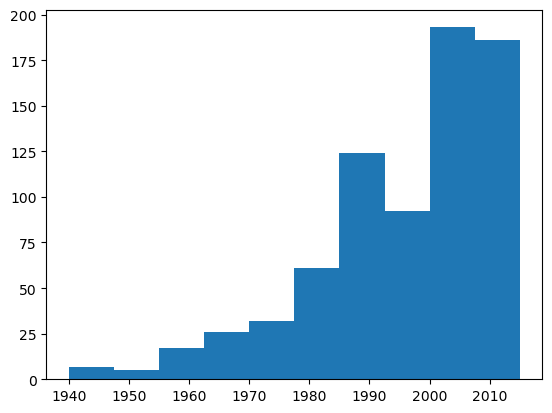

In [8]:
x_axis_range = (1940, 2015)
plt.hist(data['yr_renovated'], range= x_axis_range);

In [9]:
data['waterfront'].unique()

array([nan, 'NO', 'YES'], dtype=object)

In [10]:
#Delete missing rows in waterfront column
data = data[pd.notna(data['waterfront'])]
len(data)

19221

In [11]:
#Delete missing rows from yr_renovated column
data = data[pd.notna(data['yr_renovated'])]
len(data)

15809

In [12]:
#Convert data column to date-time object
data['date'] = pd.to_datetime(data['date'], format= '%m/%d/%Y')

In [13]:
data['date'].head()

1   2014-12-09
3   2014-12-09
4   2015-02-18
5   2014-05-12
6   2014-06-27
Name: date, dtype: datetime64[ns]

In [14]:
#replace nan values in view column to NONE
data.loc[data['view'].isna(), 'view'] = 'NONE'

In [15]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [16]:
data['sqft_basement'].value_counts()

sqft_basement
0.0       9384
?          335
600.0      155
500.0      151
700.0      148
          ... 
2010.0       1
2490.0       1
1913.0       1
4820.0       1
248.0        1
Name: count, Length: 285, dtype: int64

In [17]:
data['sqft_basement'].mode()

0    0.0
Name: sqft_basement, dtype: object

In [18]:
data.loc[data['sqft_basement'] == '?', 'sqft_basement'] = data['sqft_basement'].mode().iloc[0]

In [19]:
data['sqft_basement'] = data['sqft_basement'].astype('float64')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15809 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             15809 non-null  int64         
 1   date           15809 non-null  datetime64[ns]
 2   price          15809 non-null  float64       
 3   bedrooms       15809 non-null  int64         
 4   bathrooms      15809 non-null  float64       
 5   sqft_living    15809 non-null  int64         
 6   sqft_lot       15809 non-null  int64         
 7   floors         15809 non-null  float64       
 8   waterfront     15809 non-null  object        
 9   view           15809 non-null  object        
 10  condition      15809 non-null  object        
 11  grade          15809 non-null  object        
 12  sqft_above     15809 non-null  int64         
 13  sqft_basement  15809 non-null  float64       
 14  yr_built       15809 non-null  int64         
 15  yr_renovated   15809 non

In [20]:
data[['sqft_living', 'sqft_basement', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_lot']].sample(n=10)

,sqft_living,sqft_basement,sqft_above,sqft_living15,sqft_lot15,sqft_lot
15287,2210,750.0,1460,1590,10850,13500
16817,3560,1000.0,2560,3100,18047,16782
7894,2010,0.0,2010,1890,11477,16736
3581,1430,0.0,1430,1600,5999,5999
15089,1870,390.0,1480,1670,7575,7575
6627,3780,670.0,3110,3310,7945,7769
7211,1820,910.0,910,1730,6050,6050
1102,1260,420.0,840,1140,8496,8378
20868,2406,0.0,2406,1767,7093,7093
4426,3700,1530.0,2170,2320,12000,16857


In [21]:
#Save cleaned data set
data.to_csv('cleaned_data.csv', index= False)

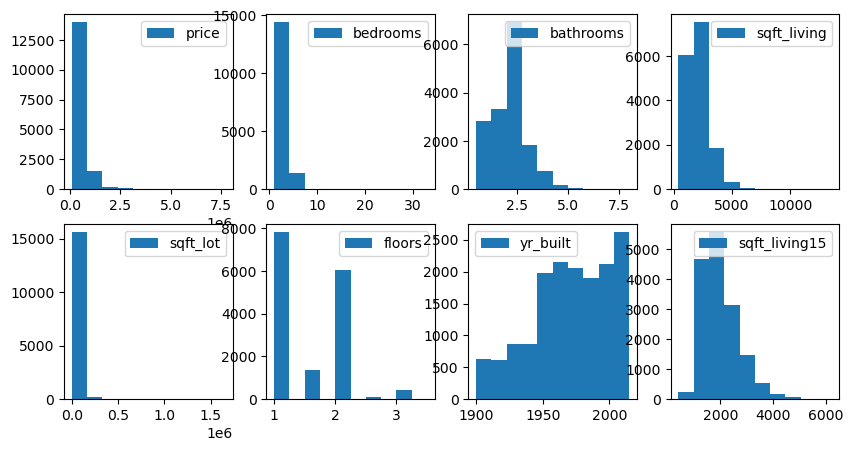

In [22]:
fig, ax = plt.subplots(2,4, figsize= (10,5))

ax[0,0].hist(data['price'], label= 'price')
ax[0,0].legend()
ax[0,1].hist(data['bedrooms'], label= 'bedrooms')
ax[0,1].legend();
ax[0,2].hist(data['bathrooms'], label= 'bathrooms')
ax[0,2].legend()
ax[0,3].hist(data['sqft_living'], label= 'sqft_living')
ax[0,3].legend()
ax[1,0].hist(data['sqft_lot'], label= 'sqft_lot')
ax[1,0].legend()
ax[1,1].hist(data['floors'], label= 'floors')
ax[1,1].legend()
ax[1,2].hist(data['yr_built'], label= 'yr_built')
ax[1,2].legend()
ax[1,3].hist(data['sqft_living15'], label= 'sqft_living15')
ax[1,3].legend();

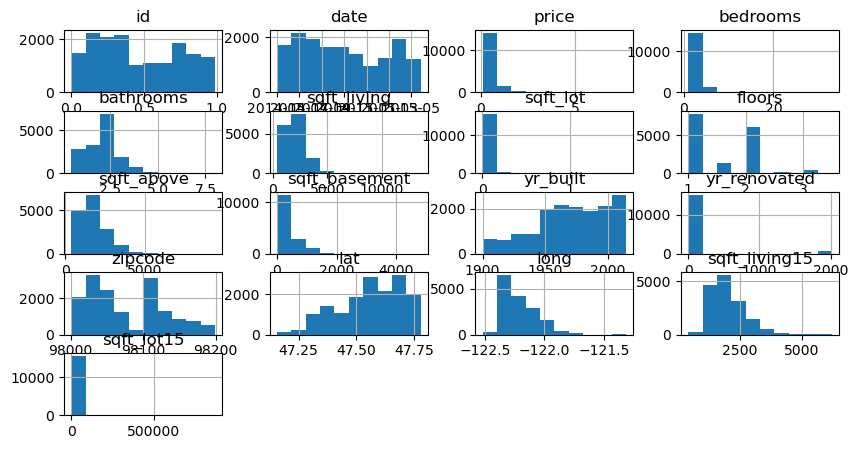

In [23]:
data.hist(figsize= (10,5));

In [24]:
#Feature engineering
#Substract year built from year renovated to get number of years before renovation

data['YrsB4Renovation'] = data['yr_renovated'] - data['yr_built']

In [25]:
data['grade'].value_counts()

grade
7 Average        6562
8 Good           4444
9 Better         1927
6 Low Average    1488
10 Very Good      835
11 Excellent      291
5 Fair            167
12 Luxury          67
4 Low              16
13 Mansion         11
3 Poor              1
Name: count, dtype: int64

In [26]:
print(data[['sqft_living', 'sqft_basement', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_lot',
           'sqft_lot15', 'floors', 'bedrooms', 'bathrooms', 'YrsB4Renovation','price']].corr().sort_values(by='price'))

                 sqft_living  sqft_basement  sqft_above  sqft_living15  \
sqft_lot15          0.176336       0.017936    0.185164       0.180850   
sqft_lot15          0.176336       0.017936    0.185164       0.180850   
sqft_lot            0.164960       0.016602    0.174018       0.144950   
YrsB4Renovation     0.026752       0.072982   -0.011311      -0.028449   
floors              0.359629      -0.238727    0.529702       0.282849   
bedrooms            0.573750       0.297331    0.474464       0.391217   
sqft_basement       0.430959       1.000000   -0.049638       0.198685   
bathrooms           0.754361       0.277599    0.686171       0.570180   
sqft_living15       0.756818       0.198685    0.732934       1.000000   
sqft_above          0.876023      -0.049638    1.000000       0.732934   
sqft_living         1.000000       0.430959    0.876023       0.756818   
price               0.706530       0.318558    0.611587       0.581204   

                 sqft_lot15  sqft_lot

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15809 entries, 1 to 21596
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               15809 non-null  int64         
 1   date             15809 non-null  datetime64[ns]
 2   price            15809 non-null  float64       
 3   bedrooms         15809 non-null  int64         
 4   bathrooms        15809 non-null  float64       
 5   sqft_living      15809 non-null  int64         
 6   sqft_lot         15809 non-null  int64         
 7   floors           15809 non-null  float64       
 8   waterfront       15809 non-null  object        
 9   view             15809 non-null  object        
 10  condition        15809 non-null  object        
 11  grade            15809 non-null  object        
 12  sqft_above       15809 non-null  int64         
 13  sqft_basement    15809 non-null  float64       
 14  yr_built         15809 non-null  int64     

In [28]:
data['grade'].value_counts()

grade
7 Average        6562
8 Good           4444
9 Better         1927
6 Low Average    1488
10 Very Good      835
11 Excellent      291
5 Fair            167
12 Luxury          67
4 Low              16
13 Mansion         11
3 Poor              1
Name: count, dtype: int64

In [29]:
grade_mapping = {
    '3 Poor': 0,
    '4 Low': 1,
    '6 Low Average': 2,
    '7 Average': 3,
    '5 Fair': 4,
    '8 Good': 5,
    '9 Better': 6,
    '10 Very Good': 7,
    '11 Excellent': 8,
    '12 Luxury': 9,
    '13 Mansion': 10
}
data['grade_ordinal'] = data['grade'].map(grade_mapping)

In [30]:
view_mapping = {
    'NONE': 0,
    'AVERAGE': 1,
    'FAIR': 2,
    'GOOD': 3,
    'EXCELLENT': 4
}

data['view_ordinal'] = data['view'].map(view_mapping)

In [31]:
condition_mapping = {
    'Poor': 0,
    'Average': 1,
    'Fair': 2,
    'Good': 3,
    'Very Good': 4
}
data['condition_ordinal'] = data['condition'].map(condition_mapping)

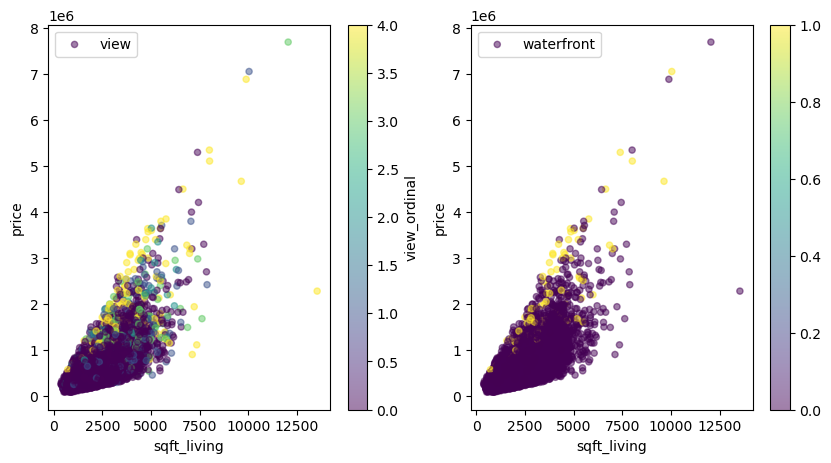

In [32]:
#Check for Interactions between sq_living with Waterfront and View in determining price
fig, ax = plt.subplots(1,2, figsize= (10,5))
data.plot.scatter('sqft_living', 'price', c='view_ordinal', cmap="viridis", alpha= .5, ax = ax[0], label= 'view')
data.plot.scatter('sqft_living', 'price', c=pd.Categorical(data['waterfront']).codes, 
                  cmap="viridis", alpha= .5, ax = ax[1], label= 'waterfront');
plt.legend();

In [33]:
data = pd.get_dummies(data, columns= ['waterfront', 'view'], dtype= int)

data.drop(columns= ['waterfront_NO', 'view_NONE'], inplace= True)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,...,sqft_lot15,YrsB4Renovation,grade_ordinal,view_ordinal,condition_ordinal,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,...,7639,40.0,3,0,1,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,...,5000,-1965.0,3,0,4,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,...,7503,-1987.0,5,0,1,0,0,0,0,0
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,Average,11 Excellent,...,101930,-2001.0,8,0,1,0,0,0,0,0
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,Average,7 Average,...,6819,-1995.0,3,0,1,0,0,0,0,0


In [34]:
data.drop(columns=['condition', 'grade']).corr().sort_values(by='price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,sqft_lot15,YrsB4Renovation,grade_ordinal,view_ordinal,condition_ordinal,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD
zipcode,-0.007627,0.007431,-0.049564,-0.147252,-0.199875,-0.196554,-0.129101,-0.058602,-0.257494,0.072030,...,-0.145820,0.092141,-0.187007,0.086651,-0.006199,0.029702,0.046711,0.046478,0.044937,0.041518
id,1.000000,0.005237,-0.014411,0.007871,0.005784,-0.008239,-0.135631,0.020476,-0.009229,-0.000043,...,-0.141352,-0.011995,0.009583,0.011186,-0.026675,-0.000727,0.013972,0.017648,-0.003130,-0.006251
date,0.005237,1.000000,-0.001392,-0.010069,-0.030454,-0.030002,0.006499,-0.018617,-0.023507,-0.016467,...,0.002176,-0.023731,-0.034192,-0.004290,-0.042948,0.000966,0.006896,-0.002930,0.004980,-0.009668
condition_ordinal,-0.026675,-0.042948,0.013935,0.002343,-0.169932,-0.087647,-0.001178,-0.300011,-0.184110,0.156097,...,0.005406,-0.038008,-0.184198,0.043779,1.000000,0.019208,0.026488,0.028591,0.020832,0.015011
long,0.019513,-0.010592,0.020887,0.129138,0.222691,0.238877,0.231822,0.130332,0.341796,-0.141210,...,0.255164,-0.099042,0.209766,-0.085950,-0.110166,-0.042055,-0.032291,-0.042094,-0.066181,-0.040018
yr_built,0.023852,0.000899,0.049679,0.153824,0.504720,0.314645,0.051929,0.487087,0.419170,-0.127334,...,0.070717,-0.292047,0.441739,-0.052921,-0.399565,-0.023442,-0.046549,-0.023378,-0.033574,-0.019128
sqft_lot15,-0.141352,0.002176,0.079027,0.024844,0.081324,0.176336,0.719935,-0.013395,0.185164,0.017936,...,1.000000,-0.002848,0.110239,0.061410,0.005406,0.029692,0.044772,0.023424,-0.010232,0.058205
sqft_lot,-0.135631,0.006499,0.083997,0.025019,0.079601,0.164960,1.000000,-0.009642,0.174018,0.016602,...,0.719935,-0.001822,0.107853,0.067095,-0.001178,0.025928,0.045177,0.020024,-0.011134,0.071488
view_FAIR,-0.003130,0.004980,0.094988,0.022494,0.037488,0.067299,-0.011134,-0.026372,0.022661,0.096569,...,-0.010232,0.029928,0.050139,0.317253,0.020832,-0.005143,-0.026762,-0.015577,1.000000,-0.018823
YrsB4Renovation,-0.011995,-0.023731,0.116691,0.006047,0.009840,0.026752,-0.001822,-0.035380,-0.011311,0.072982,...,-0.002848,1.000000,-0.019129,0.105396,-0.038008,0.087310,0.025686,0.073197,0.029928,0.060291


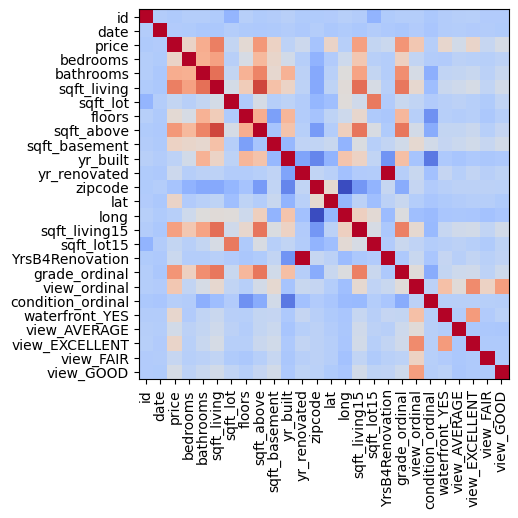

In [35]:
names = data.drop(columns=['condition', 'grade']).columns
plt.imshow(data.drop(columns=['condition', 'grade']).corr(), cmap= 'coolwarm')
plt.xticks(np.arange(len(names)), names, rotation= 90)
plt.yticks(np.arange(len(names)), names)
plt.show()

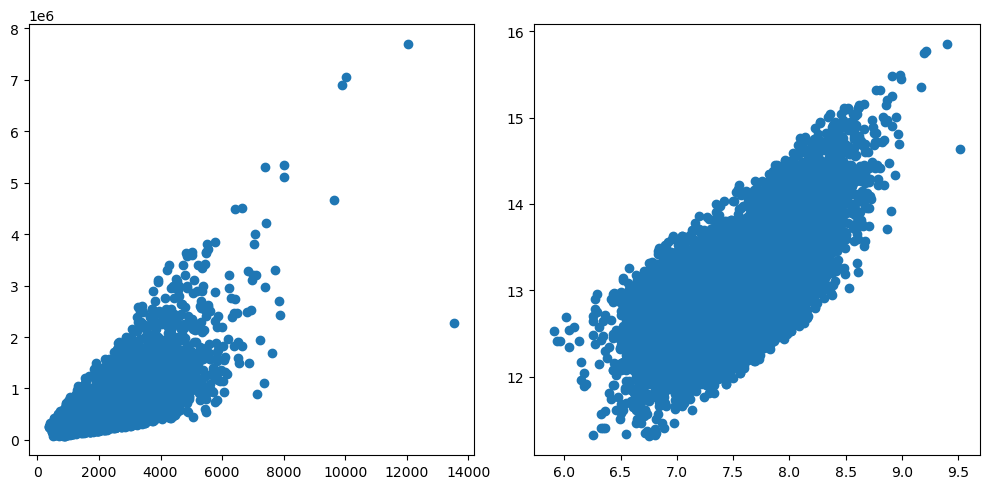

In [36]:
fig, ax = plt.subplots(1,2, figsize= (10,5))
ax[0].scatter(data['sqft_living'], data['price'])
ax[1].scatter(np.log(data['sqft_living']), np.log(data['price']))
plt.tight_layout();

In [37]:
y = data['price']
X = data[['sqft_living']]
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.576e+04
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:54:38   Log-Likelihood:            -2.1982e+05
No. Observations:               15809   AIC:                         4.397e+05
Df Residuals:                   15807   BIC:                         4.397e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.752e+04   5216.098    -11.027      

In [38]:
ylog = np.log(data['price'])
Xlog = np.log(data[['sqft_living']])
log_model = sm.OLS(ylog, sm.add_constant(Xlog)).fit()
print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                 1.330e+04
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:54:38   Log-Likelihood:                -7466.2
No. Observations:               15809   AIC:                         1.494e+04
Df Residuals:                   15807   BIC:                         1.495e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7045      0.055    121.664      

In [39]:
data['sqft_basement'] = data['sqft_basement'].astype('float64')

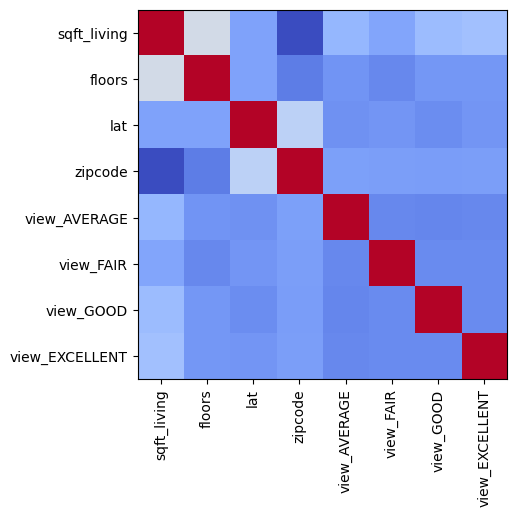

In [40]:
y = np.log(data['price'])
X = data[['sqft_living', 'floors', 'lat', 'zipcode', 'view_AVERAGE', 'view_FAIR', 'view_GOOD',
          'view_EXCELLENT']].copy()

names = X.columns
plt.imshow(X.corr(), cmap= 'coolwarm')
plt.xticks(np.arange(len(names)), names, rotation= 90)
plt.yticks(np.arange(len(names)), names)
plt.show()

In [41]:
# Multiple linear regression with raw data (includes log-transformed sqft_living and target variable i.e price)

X['sqft_living'] = np.log(X['sqft_living'])
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     4149.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:54:38   Log-Likelihood:                -3347.3
No. Observations:               15809   AIC:                             6713.
Df Residuals:                   15800   BIC:                             6782.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -31.9284      4.576     -6.

/var/folders/6s/tl4bp6ld5hn0_f_lz0b38n780000gn/T/ipykernel_47100/4016011122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sqft_living'] = np.log(X['sqft_living'])


In [42]:
y_pred = model.predict(sm.add_constant(X))
mean_squared_error(y, y_pred, squared= False)

0.2990323041234822

In [43]:
# Statistical Testing for Linearity (Rainbow test)
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(model)

(0.960361435426387, 0.9638587243843401)

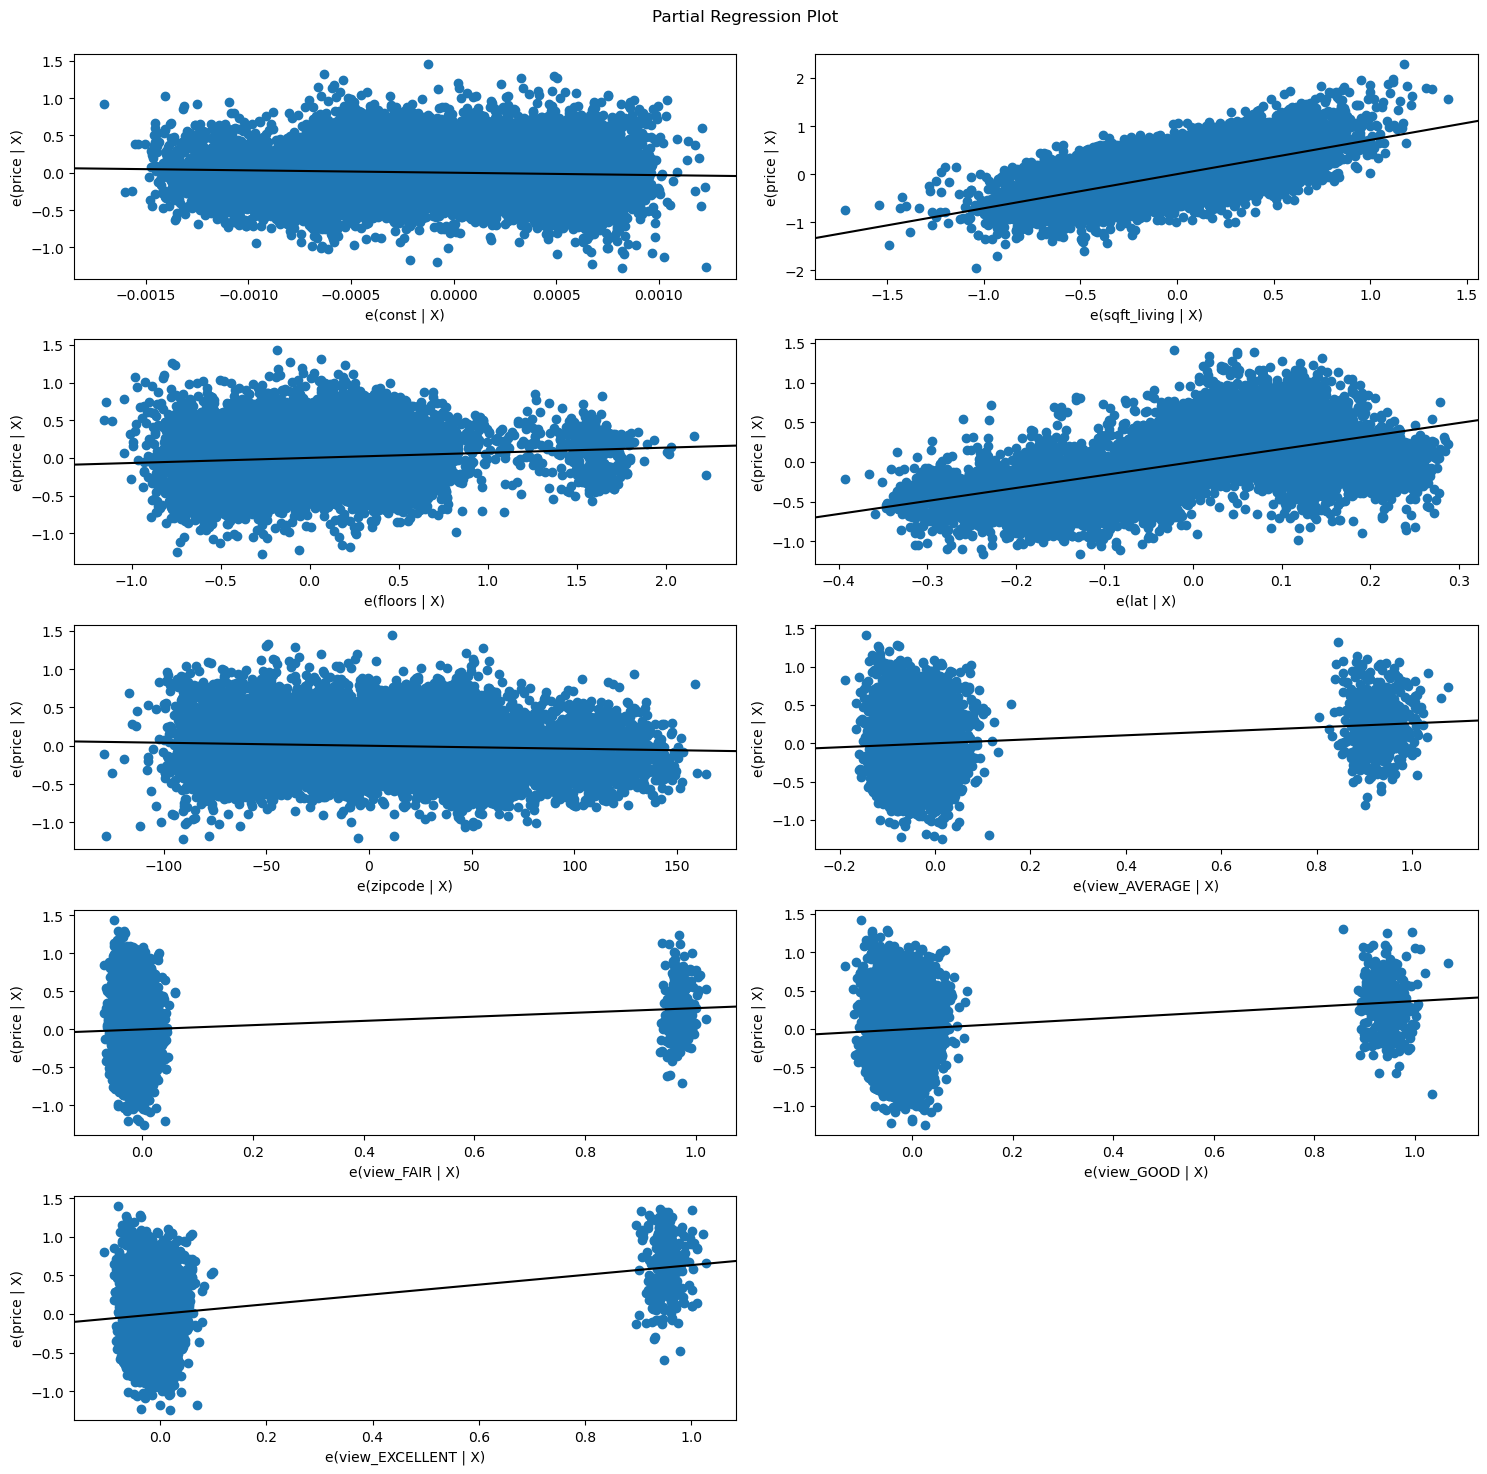

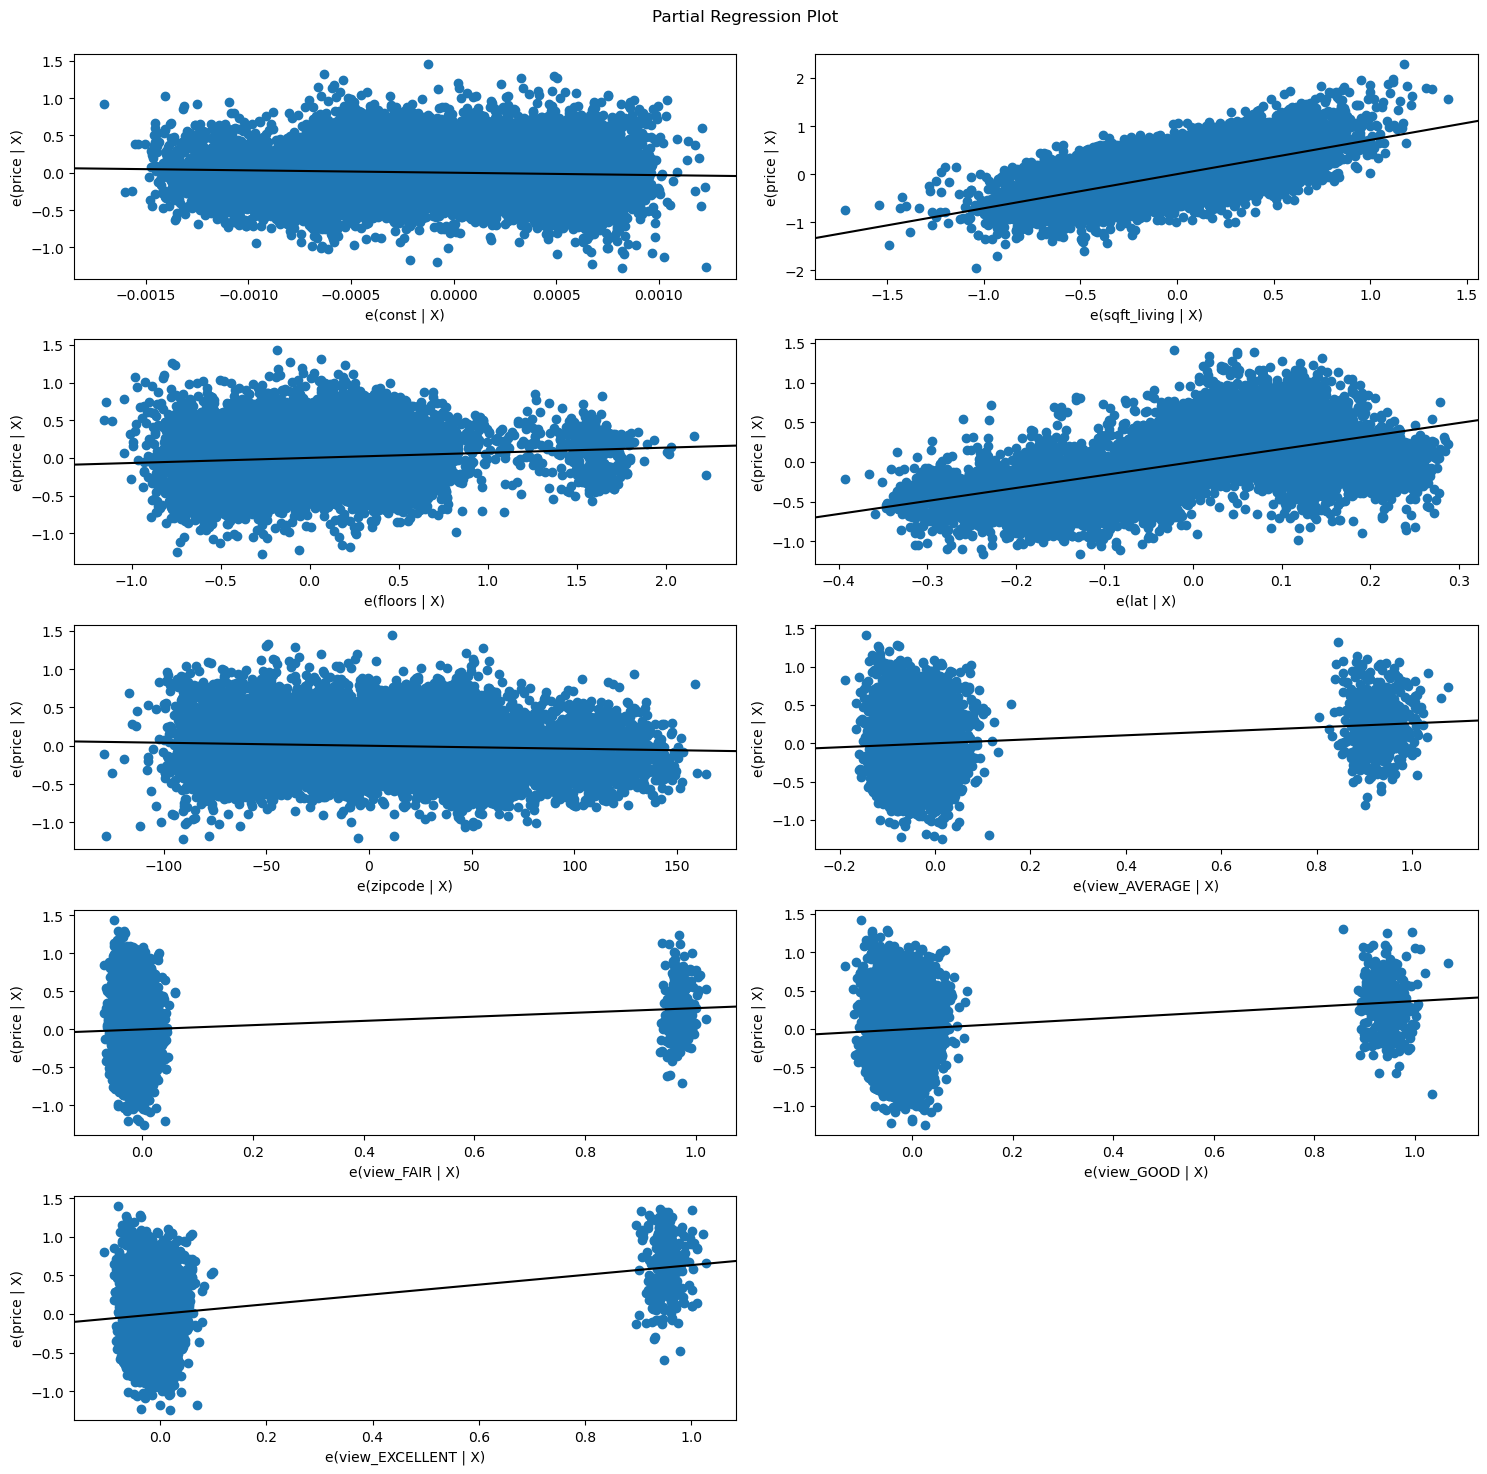

In [44]:
sm.graphics.plot_partregress_grid(model, fig= plt.figure(figsize=(15,15)))

In [45]:
#Mean centered predictors
X_centered = X.copy()
for col in X_centered.columns:
    X_centered[col] -= X_centered[col].mean()

model = sm.OLS(y, sm.add_constant(X_centered)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     4149.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:54:39   Log-Likelihood:                -3347.3
No. Observations:               15809   AIC:                             6713.
Df Residuals:                   15800   BIC:                             6782.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.0496      0.002   5485.

In [46]:
y_pred = model.predict(sm.add_constant(X))
mean_squared_error(y, y_pred, squared= False)

44.978989920416076

In [47]:
#Standardised predictors
X_standardised = X.copy()
for col in X_standardised.columns:
    X_standardised[col] = (X_standardised[col] - X_standardised[col].mean())/X_standardised[col].std()

model = sm.OLS(y, sm.add_constant(X_standardised)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     4149.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:54:39   Log-Likelihood:                -3347.3
No. Observations:               15809   AIC:                             6713.
Df Residuals:                   15800   BIC:                             6782.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.0496      0.002   5485.

In [48]:
y_pred = model.predict(sm.add_constant(X))
mean_squared_error(y, y_pred, squared= False)

2034.442948041686

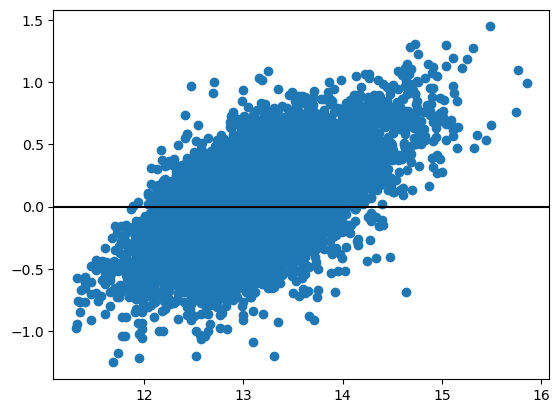

In [52]:
plt.scatter(y, model.resid)
plt.axhline(y=0, color= 'black');

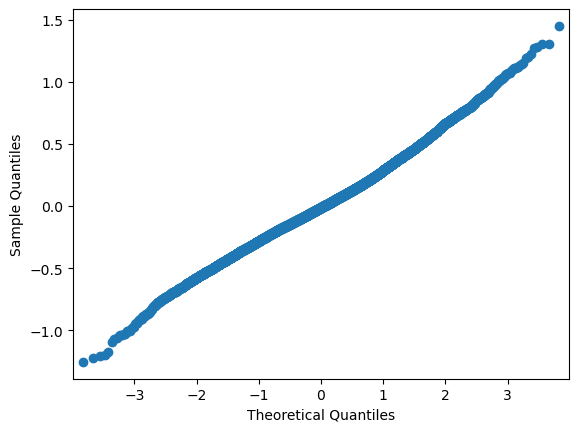

In [53]:
sm.graphics.qqplot(model.resid);